In [40]:
import pandas as pd

# Загрузить CSV файл
df = pd.read_csv('data/portfolio_history.csv')

# Получить уникальные значения из колонки 'Ticker'
unique_tickers = df['Ticker'].unique()

# Вывести список уникальных тикеров
for ticker in unique_tickers:
    print(ticker)

PLTR
ABNB
NCLH
NFLX
BIIB
PYPL
MKTX
WYNN
RCL
CCL
INTC
BAX
VTRS
WST
COP
TFX
ALGN
CRL
MPC
FIS
VZ
CPAY
GNRC
SWK
META
CTLT
WDC
CHTR
TSLA


In [44]:
import pandas as pd

# Загрузить файл с производительностью моделей
performance_df = pd.read_csv('data/model_performance.csv', index_col=0)

# Фильтруем DataFrame по уникальным тикерам
filtered_performance = performance_df.loc[performance_df.index.isin(unique_tickers)]

# Выводим отфильтрованный DataFrame
print(filtered_performance)

# Сохраняем отфильтрованный DataFrame в новый CSV файл
filtered_performance.to_csv('data/portfolio_tickers_model_performance.csv')

print("Данные сохранены в файл portfolio_tickers_model_performance.csv")

              MSE        MAE
ABNB    80.818647   7.028040
ALGN  1826.260875  34.883441
BAX      2.174757   1.081540
BIIB   154.899405  11.679724
CCL      1.334666   0.941292
CHTR   327.665660  14.736794
COP     11.862499   2.739763
CPAY    36.550932   4.507907
CRL    447.697590  16.767985
CTLT    16.912218   3.198828
FIS     14.939421   3.013891
GNRC   229.295735  12.104626
INTC     1.445923   0.979884
META   259.203170  11.337695
MKTX   239.872900  11.703320
MPC      6.312030   2.042896
NCLH     1.795464   1.062967
NFLX  1422.291594  25.579181
PLTR     3.679270   1.668305
PYPL    89.585788   7.252800
RCL     11.828245   2.802366
SWK     24.035997   3.766981
TFX     93.224572   7.490150
TSLA   321.988599  14.804284
VTRS     0.231248   0.299275
VZ       0.620274   0.565306
WDC      6.243032   1.900070
WST    561.256635  18.917293
WYNN    12.857855   2.794422
Данные сохранены в файл portfolio_tickers_model_performance.csv


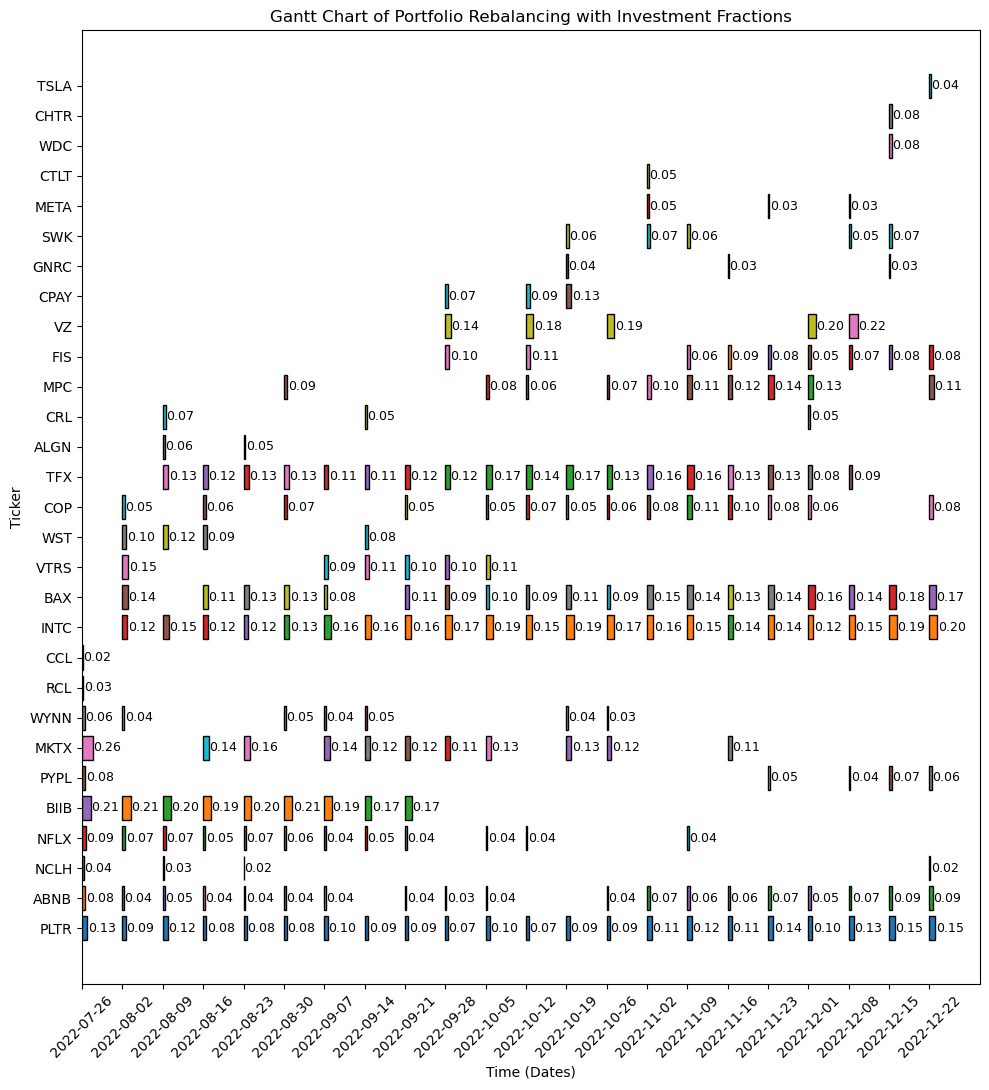

Диаграмма Ганта сохранена в 'reports/portfolio_rebalancing_gantt.png'


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Загрузить данные из CSV файла
df = pd.read_csv('data/portfolio_history.csv')

# Преобразуем дату в формат datetime
df['Date'] = pd.to_datetime(df['Date'])

# Получим список уникальных дат и тикеров
unique_dates = df['Date'].unique()
unique_tickers = df['Ticker'].unique()

# Количество уникальных дат
num_dates = len(unique_dates)

# Создаем единый график, используя подграфики (subplots)
fig, ax = plt.subplots(figsize=(10, num_dates * 0.5))

# Преобразуем тикеры в индексы для оси Y
ticker_to_index = {ticker: i for i, ticker in enumerate(unique_tickers)}

# Создаем диаграмму Ганта
for i, date in enumerate(unique_dates):
    # Выбираем данные для текущей даты
    date_data = df[df['Date'] == date]

    # Добавляем горизонтальные полосы для каждого тикера
    for ticker, frac in zip(date_data['Ticker'], date_data['Investment Fraction']):
        ax.barh(ticker_to_index[ticker], frac, left=i, height=0.8, edgecolor='black')

        # Отображаем значение инвестиционной доли рядом с полосой, слегка смещенное вправо и округленное до двух знаков
        ax.text(i + frac + 0.01, ticker_to_index[ticker], f'{frac:.2f}', va='center', ha='left', color='black', fontsize=9)

# Настройка меток осей
ax.set_yticks(range(len(unique_tickers)))
ax.set_yticklabels(unique_tickers)
ax.set_xticks(range(len(unique_dates)))
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in unique_dates], rotation=45)

# Добавление заголовка и меток осей
ax.set_xlabel('Time (Dates)')
ax.set_ylabel('Ticker')
ax.set_title('Gantt Chart of Portfolio Rebalancing with Investment Fractions')

# Сохранение диаграммы Ганта
plt.tight_layout()
if not os.path.exists('reports'):
    os.makedirs('reports')

plt.savefig('reports/portfolio_rebalancing_gantt.png')
plt.show()

print(f"Диаграмма Ганта сохранена в 'reports/portfolio_rebalancing_gantt.png'")

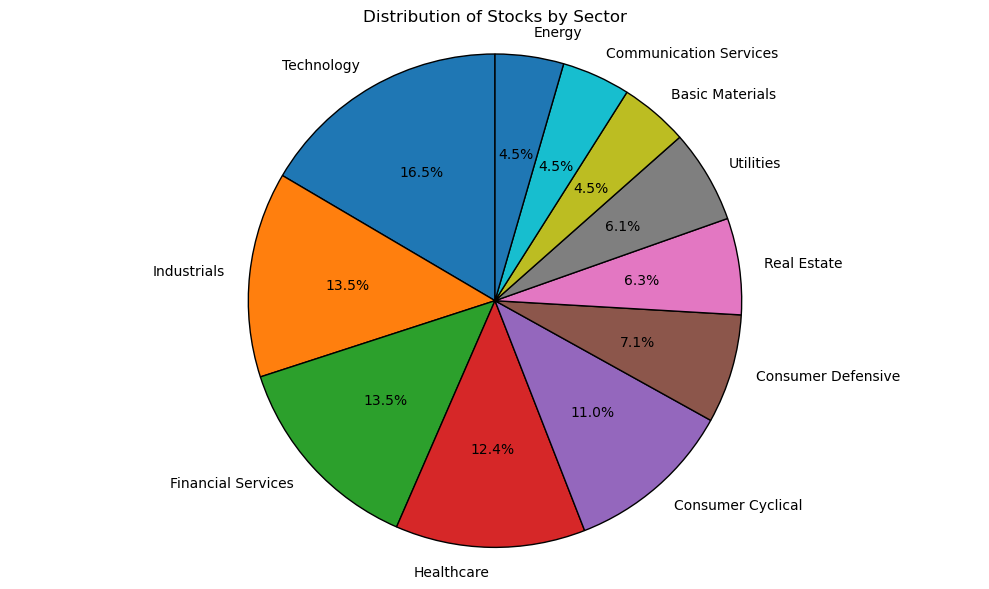

Круговая диаграмма сохранена в 'report/sector_distribution_pie_chart.png'


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файлов
clean_data = pd.read_csv('data/cleaned_sp500_data.csv')
sectors_data = pd.read_csv('data/sectors.csv', index_col=0)

# Объединение данных по тикерам
merged_data = pd.merge(clean_data[['Ticker']], sectors_data, left_on='Ticker', right_index=True)

# Подсчет количества тикеров в каждом секторе
sector_distribution = merged_data['Sector'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(10, 6))
plt.pie(sector_distribution, labels=sector_distribution.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Stocks by Sector')
plt.axis('equal')  # Это необходимо для того, чтобы круговая диаграмма выглядела как круг
plt.tight_layout()

# Сохранение диаграммы
plt.savefig('reports/sector_distribution_pie_chart.png')

# Отображение диаграммы
plt.show()

print("Круговая диаграмма сохранена в 'report/sector_distribution_pie_chart.png'")

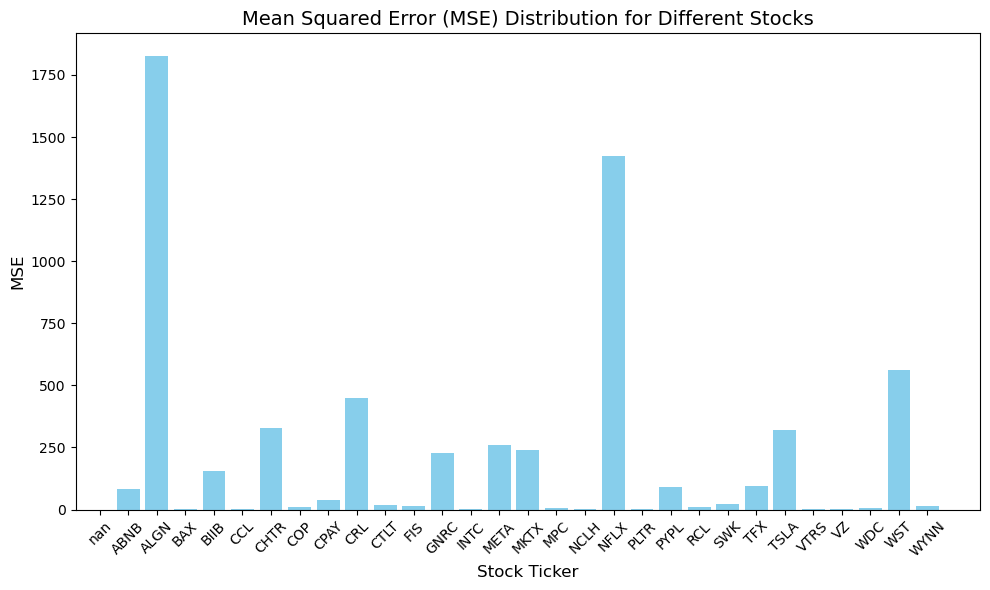

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file, providing column names explicitly
data = pd.read_csv('data/portfolio_tickers_model_performance.csv', header=None, names=['Ticker', 'MSE', 'MAE'])

# Ensure that the 'Ticker' column is treated as strings
data['Ticker'] = data['Ticker'].astype(str)

# Convert MSE column to numeric, forcing errors to NaN if there are non-numeric values
data['MSE'] = pd.to_numeric(data['MSE'], errors='coerce')

# Round the MSE values to 2 decimal places
data['MSE'] = data['MSE'].round(2)

# Set up the figure
plt.figure(figsize=(10, 6))

# Plotting the Mean Squared Error (MSE) for each stock
plt.bar(data['Ticker'], data['MSE'], color='skyblue')

# Adding title and labels
plt.title('Mean Squared Error (MSE) Distribution for Different Stocks', fontsize=14)
plt.xlabel('Stock Ticker', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()